# How are People Without Degrees Losing out on Income
### Data Courtesy of the Bureau of Labor Statistics
## Background
As cost of living in the United States increases one question that I have often pondered is how will those without a college education be affected. Many individuals with college educations are struggling to get by in their entry level positions so how are those with very little to no education doing?
---
**Some of the research questions we will be exploring:**

*   What does Job Growth look like for those without degrees?
*   How do their salaries compare to those with degrees?

This project is also available as a [Tableau Dashboard](https://public.tableau.com/app/profile/kevin.jordan6632/viz/CareerProjecitonsbyEducation-dashboard/Dashboard1#1)

# **Approach**
This project employs Python's Pandas,seaborn, and matplotlib libaries as well as the GCP API.
Queries will be made through SQL and then converted to data frames.
The results will be visualized using Seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import pydata_google_auth
from google.colab import auth
auth.authenticate_user()
project_id = 'job-projections-2022'
client = bigquery.Client(project=project_id)

In [ ]:
job_proj_df = client.query('''
  SELECT *
  FROM `job_projections_22.job_projections`
  WHERE
  Typical__Education_level <> 'Some college, no degree' AND
  Typical__Education_level <> 'Postsecondary nondegree award' AND
  Typical__Education_level <> "Associate's degree"
  ''').to_dataframe()
job_proj_df
sns.set_theme(style="ticks", palette="pastel")

In [ ]:
avg_wages = client.query('''
  SELECT
  Typical__Education_level,
  ROUND(AVG(Median_Annual_Wage_2022),2) AS average_salary
  FROM `job_projections_22.job_projections`
  WHERE
  Typical__Education_level <> 'Some college, no degree' AND
  Typical__Education_level <> 'Postsecondary nondegree award' AND
  Typical__Education_level <> "Associate's degree"
  GROUP BY Typical__Education_level
  ''').to_dataframe()
avg_wages

,Typical__Education_level,average_salary
0,Doctoral or professional degree,129944.86
1,Master's degree,87214.87
2,Bachelor's degree,83147.82
3,High school diploma or equivalent,48050.95
4,No Education,39277.79


# Average Yearly Income by Degree
- The highest average yearly income goes to those with doctoral or professional degrees, such as medical degrees and Juris Doctorates.
- Right next to that is the Master's Degree holders followed by the Bachelor's Degree holders.
- At the bottom are those with no education or just high school diplomas.

Text(0, 0.5, 'Level of Education')

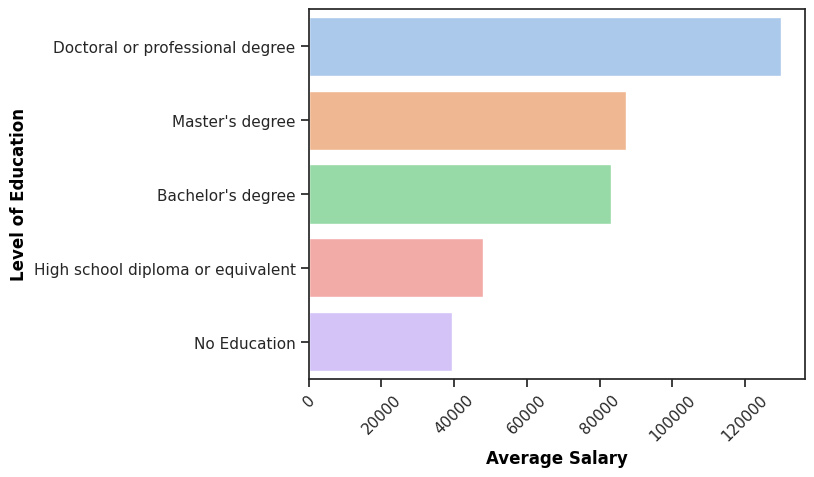

In [ ]:
sns.barplot(data = avg_wages,y='Typical__Education_level',x='average_salary')
plt.xticks(rotation=45)
plt.xlabel('Average Salary', weight = 'bold', color = 'black')
plt.ylabel('Level of Education', weight = 'bold', color = 'black')

# Distribution of Salaries Across all Levels of Education
The average yearly income for all levels of education floats around 50-60k dollars.

Text(0.5, 1.0, 'Distribution of Salaries')

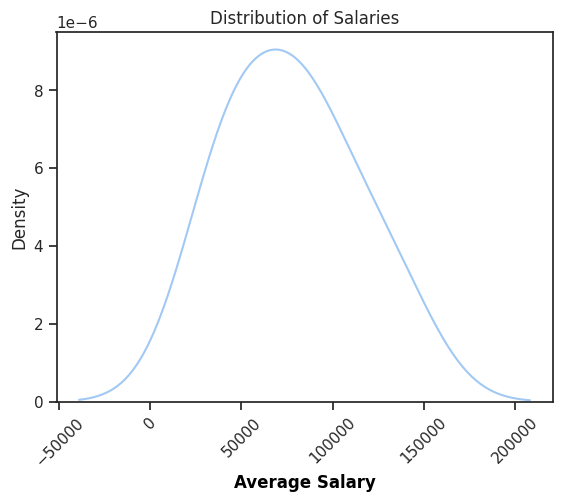

In [ ]:
sns.kdeplot(data = avg_wages,x='average_salary')
plt.xticks(rotation=45)
plt.xlabel('Average Salary', weight = 'bold', color = 'black')
plt.title('Distribution of Salaries')

# Highest Paying Jobs For Little to No Education
The highest paying jobs for individuals with little to no education are in fields that are highly specialized. These include Nuclear power reactor operators, power distributors and dispatchers and elevator and escalator repair people.

In [ ]:
jobs_little_edu = client.query('''
  SELECT
  Occupation_Title,
  Employment_2022,
  Employment_2032,
  Employment_Percent_Change_2022_2032,
  Median_Annual_Wage_2022
  FROM `job_projections_22.job_projections`
  WHERE
  Typical__Education_level = 'No Education' OR
  Typical__Education_level = 'High school diploma or equivalent'
  ORDER BY Median_Annual_Wage_2022 DESC
  ''').to_dataframe()
jobs_little_edu

,Occupation_Title,Employment_2022,Employment_2032,Employment_Percent_Change_2022_2032,Median_Annual_Wage_2022
0,Nuclear power reactor operators,5.5,5.3,-3.3,115870.0
1,Power distributors and dispatchers,9.6,9.1,-5.0,101650.0
2,Elevator and escalator installers and repairers,25.1,25.5,1.5,99000.0
3,"Transportation, storage, and distribution mana...",177.7,192.3,8.2,98560.0
4,First-line supervisors of police and detectives,137.9,142.2,3.1,96290.0
...,...,...,...,...,...
429,"Hosts and hostesses, restaurant, lounge, and c...",412.8,414.9,0.5,27720.0
430,"Ushers, lobby attendants, and ticket takers",106.6,108.3,1.6,27650.0
431,"Cooks, fast food",742.0,640.4,-13.7,27640.0
432,"Lifeguards, ski patrol, and other recreational...",113.5,120.5,6.2,27270.0


The projected job growth for many of these jobs is either **very small or negative**. Meaning that in the future there is going to be **less oportunity for those without an education**. While there is still  room for growth in some sectors, like athletes and sports competitors, and transportation, storage, and distribution managers these are outliers.
<br>
One must also take into consideration the large amount of luck it requires to become a professional athlete and whether or not it is feasible for most people to pursue to this line of work. For many with very little to no education, this is not a viable option.

In [ ]:
top_ten_little_edu = jobs_little_edu.iloc[0:10]
top_ten_little_edu

,Occupation_Title,Employment_2022,Employment_2032,Employment_Percent_Change_2022_2032,Median_Annual_Wage_2022
0,Nuclear power reactor operators,5.5,5.3,-3.3,115870.0
1,Power distributors and dispatchers,9.6,9.1,-5.0,101650.0
2,Elevator and escalator installers and repairers,25.1,25.5,1.5,99000.0
3,"Transportation, storage, and distribution mana...",177.7,192.3,8.2,98560.0
4,First-line supervisors of police and detectives,137.9,142.2,3.1,96290.0
5,Athletes and sports competitors,14.0,15.2,9.1,94270.0
6,Power plant operators,32.2,28.2,-12.5,93060.0
7,Subway and streetcar operators,9.5,9.8,3.5,88260.0
8,Detectives and criminal investigators,114.4,116.1,1.5,86280.0
9,"Petroleum pump system operators, refinery oper...",32.2,31.5,-2.3,85090.0


Text(0.5, 0, 'Median Annual Wage')

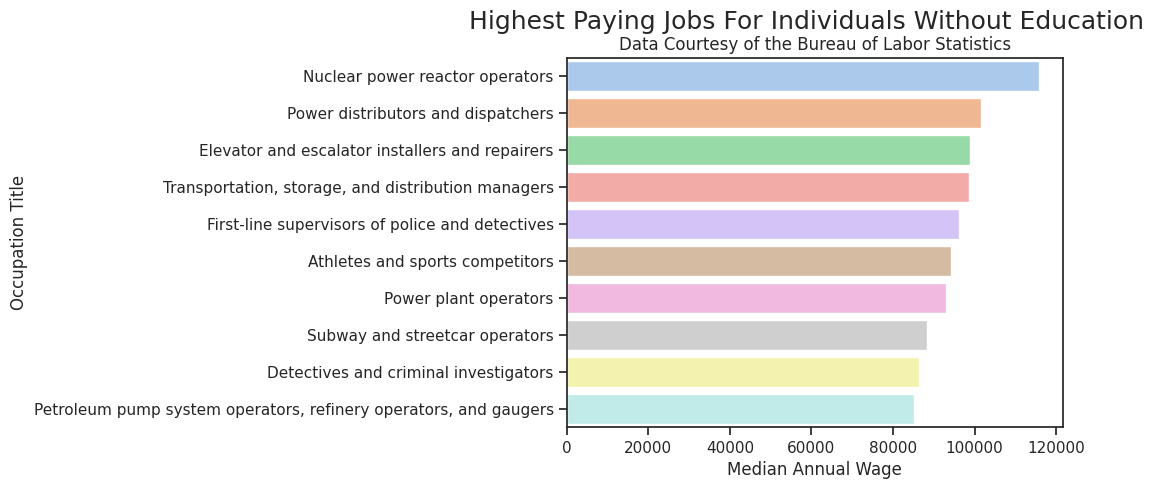

In [ ]:
plt.suptitle('Highest Paying Jobs For Individuals Without Education').set_fontsize(18)
plt.title('Data Courtesy of the Bureau of Labor Statistics')
sns.barplot(data = top_ten_little_edu, y = 'Occupation_Title',x='Median_Annual_Wage_2022')
plt.ylabel('Occupation Title')
plt.xlabel('Median Annual Wage')

# Average 10 Year Growth by Education
Now lets take a look at the average ten year growth by education.

In [ ]:
avg_percent_change = client.query('''
  SELECT
  Typical__Education_level AS level_of_education,
  ROUND(AVG(Employment_Percent_Change_2022_2032),2) AS avg_10_year_growth
  FROM `job_projections_22.job_projections`
  WHERE
  Typical__Education_level <> 'Some college, no degree' AND
  Typical__Education_level <> 'Postsecondary nondegree award' AND
  Typical__Education_level <> "Associate's degree"
  GROUP BY Typical__Education_level
  ''').to_dataframe()
avg_percent_change

,level_of_education,avg_10_year_growth
0,Doctoral or professional degree,4.89
1,Master's degree,9.75
2,Bachelor's degree,5.30
3,High school diploma or equivalent,-1.27
4,No Education,-0.55


We can see that while doctorates and professional degree holders are recieving the most pay, Master's degree holders are actually seeing the highest 10 year growth in future opportunity.
<br>
Although the jump in income from a Bachelor's degree to a Master's degree may not be that high, we see that job opportunity is rising much higer for those with an advanced degree.
<br>
Once again we see that the growth in opportunity for those without a degree or education is shrinking and while there are some positions that are proposed to increase by a large margin these are huge outliers. Job growth for these individuals is very bleak.

Text(0, 0.5, 'Level Of Education')

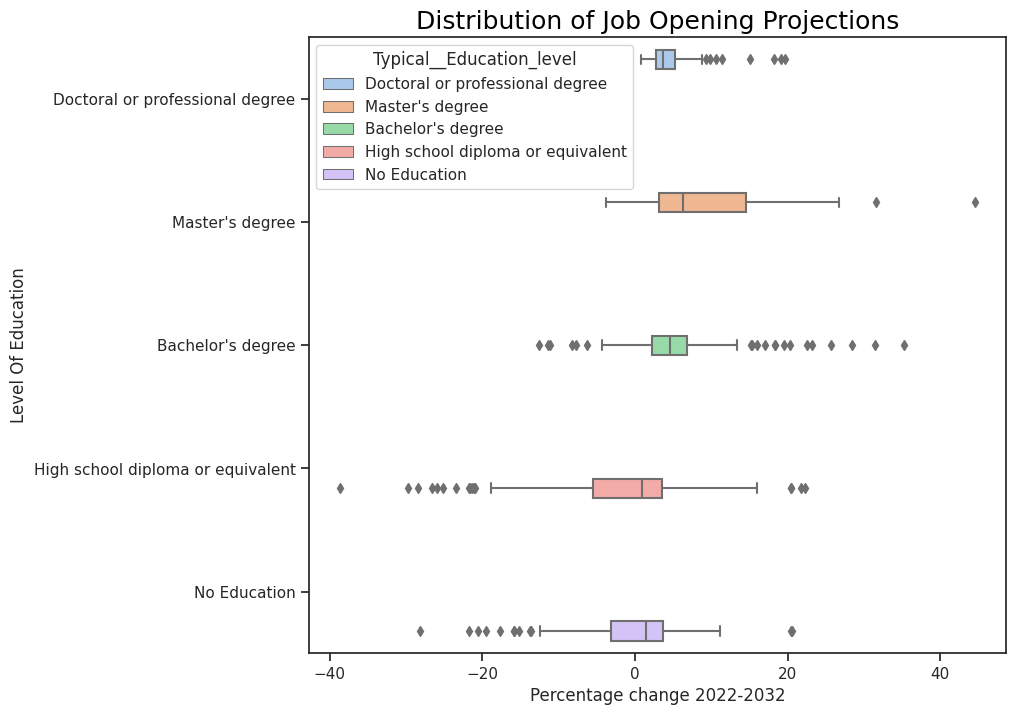

In [ ]:
plt.figure(figsize = (9,8))
plt.title('Distribution of Job Opening Projections', color = 'black').set_fontsize(18)
sns.boxplot(x="Employment_Percent_Change_2022_2032", y="Typical__Education_level",
            hue="Typical__Education_level", data=job_proj_df)
plt.xlabel('Percentage change 2022-2032')
plt.ylabel('Level Of Education')

# Conclusion
Let's bring things back to our original research questions


> What does Job Growth look like for those without degrees?

Very bleak, there is a large dip in the demand for individuals without an education. The biggest gains are being seen in those with Master's degrees, even if the jump in income isn't that large.


> How do their salaries compare to those with degrees?

Those without degrees are earning much less, in fact average yearly salary tends to increase with more education.
As much as I would like to believe I could have dropped out of college and became a professional music producer the data shows us something much different.
While there is still room for those with a High School Diploma and no education to get employed, job opportunity is steadily decreasing. So what does our data show? **Education pays**